In [17]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Import Employee Attrition data
data=pd.read_csv('employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [21]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
#These fields does not add value, hence removed
data = data.drop(['EmployeeCount','Over18'], axis = 1)

In [23]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [24]:
#Convert Categorical values to Numeric Values
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [25]:
#This function is used to convert Categorical values to Numerical values
data=pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,False,False,False,True,False,False,False,True,False,True
1,49,0,279,8,1,2,3,61,2,2,...,False,False,True,False,False,False,True,False,True,False
2,37,1,1373,2,2,4,4,92,2,1,...,False,False,False,False,False,False,False,True,False,True
3,33,0,1392,3,4,5,4,56,3,1,...,False,False,True,False,False,False,True,False,False,True
4,27,0,591,2,1,7,1,40,3,1,...,False,False,False,False,False,False,True,False,True,False


In [26]:

#Separating Feature and Target matrices
X = data.drop(['Attrition'], axis=1)
y=data['Attrition']

In [27]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [28]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [29]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [30]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

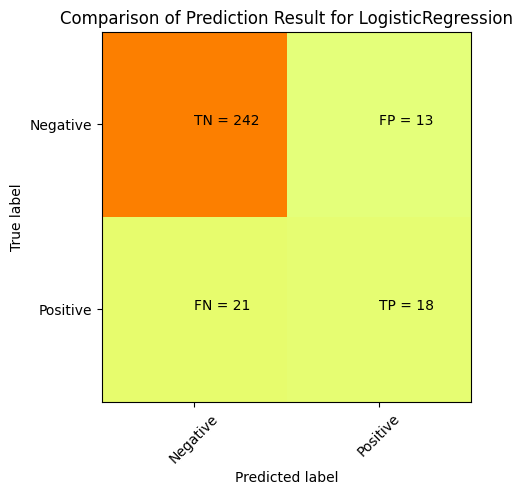

Accuracy of the Model LogisticRegression 88.4%


In [31]:
from sklearn.linear_model import  LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

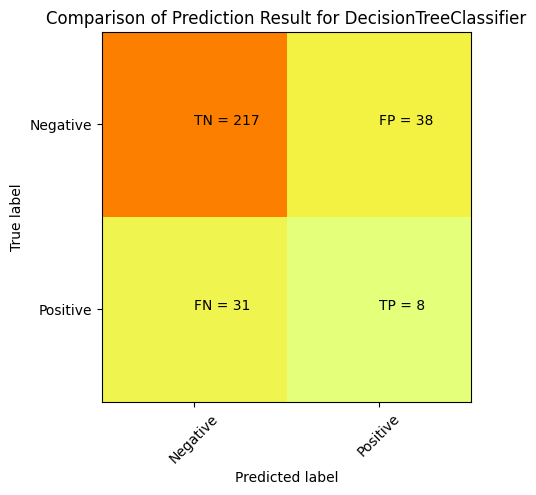

Accuracy of the Model DecisionTreeClassifier 76.5%


In [32]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

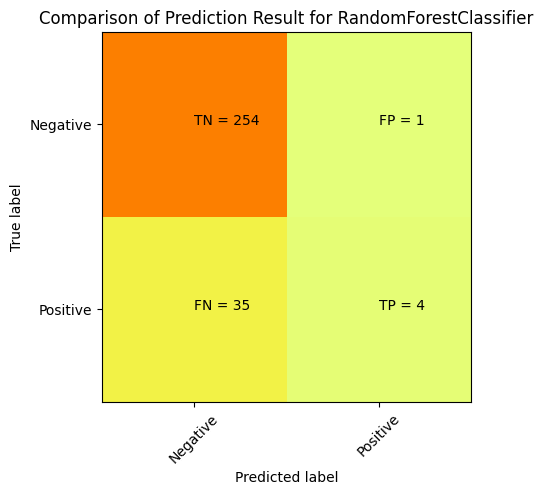

Accuracy of the Model RandomForestClassifier 87.8%


In [47]:
from sklearn.ensemble import RandomForestClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

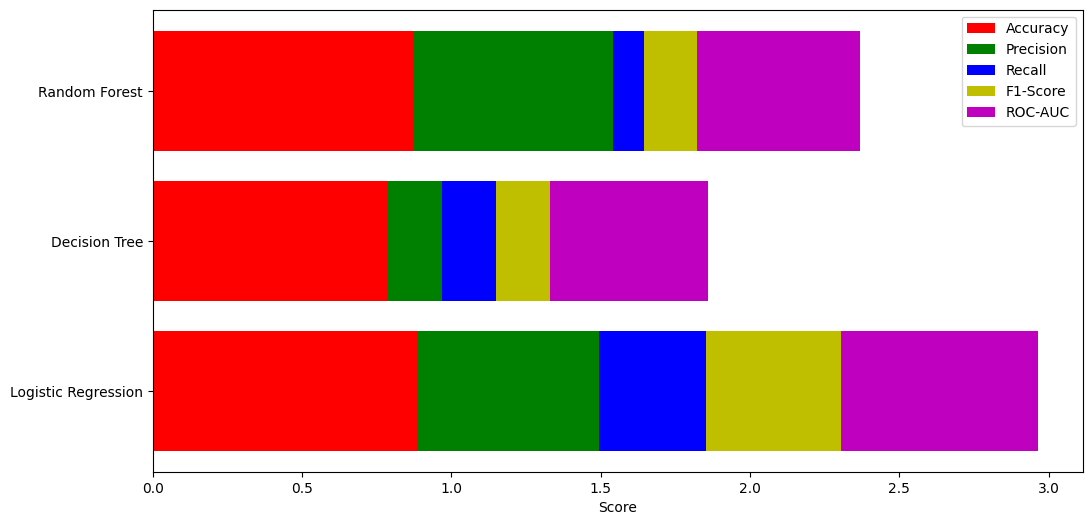

In [36]:
import matplotlib.pyplot as plt

# Function to plot metrics
def plot_metrics(models):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
    results = np.zeros((len(models), len(metrics)))

    for i, (name, model) in enumerate(models):
        y_pred = model.predict(X_test)
        results[i, 0] = accuracy_score(y_test, y_pred)
        results[i, 1] = precision_score(y_test, y_pred)
        results[i, 2] = recall_score(y_test, y_pred)
        results[i, 3] = f1_score(y_test, y_pred)
        results[i, 4] = roc_auc_score(y_test, y_pred)

    index = np.arange(len(models))
    plt.figure(figsize=(12, 6))
    plt.barh(index, results[:, 0], color='r', label='Accuracy')
    plt.barh(index, results[:, 1], left=results[:, 0], color='g', label='Precision')
    plt.barh(index, results[:, 2], left=results[:, 0] + results[:, 1], color='b', label='Recall')
    plt.barh(index, results[:, 3], left=results[:, 0] + results[:, 1] + results[:, 2], color='y', label='F1-Score')
    plt.barh(index, results[:, 4], left=results[:, 0] + results[:, 1] + results[:, 2] + results[:, 3], color='m', label='ROC-AUC')
    plt.xlabel('Score')
    plt.yticks(index, [m[0] for m in models])
    plt.legend()
    plt.show()

# Call the function
plot_metrics(models)

In [42]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
logistic_params = {'C': [0.01, 0.1, 1, 10, 100]}
decision_params = {'max_depth': [None, 10, 20, 30]}
random_forest_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}

# Perform GridSearchCV for Logistic Regression
logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# Perform GridSearchCV for Decision Tree
decision_model = DecisionTreeClassifier()
decision_grid = GridSearchCV(decision_model, decision_params, cv=5, scoring='accuracy')
decision_grid.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest
random_forest_model = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest_model, random_forest_params, cv=5, scoring='accuracy')
random_forest_grid.fit(X_train, y_train)

# Evaluate the models using appropriate metrics
models = [
    ('Logistic Regression', logistic_grid.best_estimator_),
    ('Decision Tree', decision_grid.best_estimator_),
    ('Random Forest', random_forest_grid.best_estimator_)
]

for name, model in models:
    y_pred = model.predict(X_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred):.3f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.3f}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.3f}')
    print()

# Select the best model based on evaluation metrics
best_model = max(models, key=lambda x: x[1].score(X_test, y_test))[1]
print(f'Best Model: {best_model.__class__.__name__}')



Model: Logistic Regression
Accuracy: 0.884
Precision: 0.609
Recall: 0.359
F1-Score: 0.452
ROC-AUC: 0.662

Model: Decision Tree
Accuracy: 0.786
Precision: 0.200
Recall: 0.205
F1-Score: 0.203
ROC-AUC: 0.540

Model: Random Forest
Accuracy: 0.874
Precision: 0.667
Recall: 0.103
F1-Score: 0.178
ROC-AUC: 0.547

Best Model: LogisticRegression


In [46]:
# Ensure feature_names and importance_scores are of the same length
num_features = min(len(df.columns), len(best_model.coef_[0]))

feature_names = df.columns.tolist()[:num_features]
importance_scores = np.abs(best_model.coef_[0])[:num_features]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
importance_df.sort_values('Importance', ascending=False, inplace=True)
print(importance_df.head(10))


                     Feature  Importance
22                  OverTime    0.458309
23         PercentSalaryHike    0.431139
12                HourlyRate    0.414673
9             EmployeeNumber    0.378037
5           DistanceFromHome    0.348523
21                    Over18    0.341242
24         PerformanceRating    0.320266
7             EducationField    0.314209
2             BusinessTravel    0.291390
25  RelationshipSatisfaction    0.275867
